# Exploring Star Wars Movies

## Understanding survey results for "The Empire Strikes Back" 

The survey was administered through SurveyMonkey and received 835 responses. 

The goal of this project is to clean and explore the data set. 

38 columns x 1887 rows

Column details and descriptions: 
*  RespondentID - An anonymized ID for the person taking the survey
*  Gender - The respondent's gender
*  Age - The respondent's age
*  Household Income - The respondent's income
*  Education - The respondent's education level
*  Location (Census Region) - The respondent's location
*  Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
*  Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

In [59]:
#read in the data set into a dataframe
import pandas as pd
import numpy as np
star_wars=pd.read_csv("star_wars.csv",encoding='ISO-8859-1')

In [60]:
#explore the data 
star_wars.head(10)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

Note: There are some NaN and "Response" value which may indicate that the respondent didn't answer those questions? There are 23 "Unnamed columns". There are some text fields within the ranking column which should be integers. 

In [61]:
#explore the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Note: Some of the column names are very, very long. 

In [62]:
#only select rows where the RespondentID is not null
x=pd.isnull(star_wars["RespondentID"]).sum()
print(x)
star_wars=star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.shape

1


(1186, 38)

In [63]:
pd.Series.value_counts(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"],dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [64]:
pd.Series.value_counts(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"],dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [65]:
yes_no={
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)


In [66]:
pd.Series.value_counts(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"],dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Note: Value have successfully been converted from Yes and No to True and False

In [67]:
star_wars.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


*explanation of columns*

Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.

Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.

Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.

Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.

Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.

Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

Note: if the value is the movie name then they saw that movie. if the value 

In [68]:
#let's change these columns to boolean values
unnamed_col=star_wars.columns[3:9]
survey_dict={
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

new_col={
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3", 
    "Unnamed: 6":"seen_4", 
    "Unnamed: 7":"seen_5", 
    "Unnamed: 8":"seen_6"
}

for name in unnamed_col:    
    star_wars[name]=star_wars[name].map(survey_dict)

#print(star_wars["seen_6"].unique())

star_wars=star_wars.rename(columns=new_col)
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


More column explanations:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace

Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones

Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith

Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope

Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back

Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

let's convert these values to numeric and rename the column titles

In [69]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

new_col={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"
}
star_wars=star_wars.rename(columns=new_col)


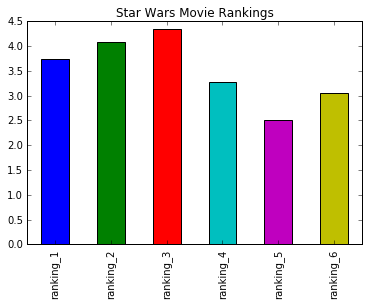

In [70]:
#let's find the highest ranked movie and plot them
mean_df=star_wars.loc[:,"ranking_1":"ranking_6"].mean().round(2)

import matplotlib.pyplot as plt
%matplotlib inline
mean_df.plot.bar(title="Star Wars Movie Rankings")

Observation: In looking at the six Star Wars movies that were ranked on a scale of 1 to 6 with 1 being the best movie and 6 being the least liked movie. It appears the first trilogy (ranking_4, ranking_5, ranking_6) has a better average ranking than the second trilogy. 

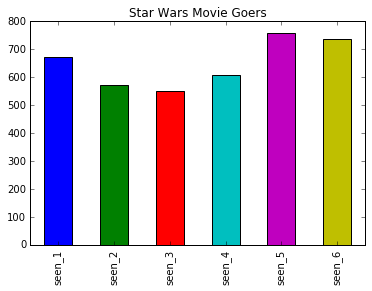

In [71]:
movie_goers=star_wars.loc[:,"seen_1":"seen_6"].sum()
movie_goers.plot.bar(title="Star Wars Movie Goers")

Observation: In studying the amount of people that saw the Star Wars movies, it is evident that as the ratings dropped during the second trilogy, less people continued to finish the trilogy. The second movie (seen_5) is typically known as the best Star Wars movie so it makes sense that the most people would have seen this one. 

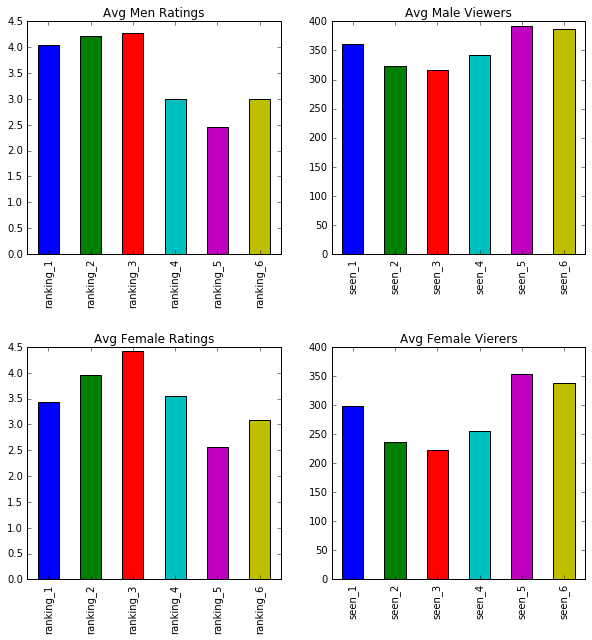

In [72]:
males=star_wars[star_wars["Gender"]=="Male"]
females=star_wars[star_wars["Gender"]=="Female"]

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1=males.loc[:,"ranking_1":"ranking_6"].mean().plot.bar(title="Avg Men Ratings")
ax2=fig.add_subplot(2,2,2)
ax2=males.loc[:,"seen_1":"seen_6"].sum().plot.bar(title="Avg Male Viewers")
ax3=fig.add_subplot(2,2,3)
ax3=females.loc[:,"ranking_1":"ranking_6"].mean().plot.bar(title="Avg Female Ratings")
ax4=fig.add_subplot(2,2,4)
ax4=females.loc[:,"seen_1":"seen_6"].sum().plot.bar(title="Avg Female Vierers")
fig.subplots_adjust(hspace=.4)


Observation: In comparing male and female viewer count by  movie and ratings, it appears that more males have seen Star Wars franchise movies relative to females. This was expected. The Empire Strikes Back (ranking_5) is the favorite for both male and female demographics. The relative order of most popular movies and most viewed are the same for both genders. 

In [73]:
#replaced nan for "Unfamiliar (N/A)" within columns 15:29
for col in range(15,29):
    star_wars.iloc[:,col].fillna("Unfamiliar (N/A)",inplace=True)


In [74]:
#let's explore education and how that affects peoples opinion of the movies
print(star_wars["Education"].isnull().sum())
star_wars["Education"].unique()

150


array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

Note: There are 150 nan values within the Education column. Though it would be easiest to delete these rows we would lose about 10% of our data. 

In [75]:
edu=star_wars.groupby(star_wars["Education"]).agg(np.sum)
edu.reset_index(inplace=True)


In [76]:
print(edu)

                          Education  RespondentID  \
0                   Bachelor degree  1.056138e+12   
1                   Graduate degree  9.047271e+11   
2                High school degree  3.454955e+11   
3      Less than high school degree  2.302882e+10   
4  Some college or Associate degree  1.079179e+12   

   Have you seen any of the 6 films in the Star Wars franchise?  seen_1  \
0                                              262.0              206.0   
1                                              226.0              179.0   
2                                               71.0               57.0   
3                                                3.0                3.0   
4                                              254.0              211.0   

   seen_2  seen_3  seen_4  seen_5  seen_6  ranking_1  ranking_2  ranking_3  \
0   170.0   163.0   195.0   243.0   234.0     1003.0     1124.0     1180.0   
1   149.0   139.0   163.0   207.0   201.0      860.0      955.0     1017.0